##### This is a simple excercise on a data which contains only parameters.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
# Importing the dataset
dataset = pd.read_csv('./Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [10]:
dataset.shape

(10, 3)

In [18]:
# Split the input and output.

'''
x = dataset.iloc[:,1].values  
------------------------------------
# couldn't use because it will create vector. But input
should be a matrix.
# Output can be vector.
'''

x = dataset.iloc[:,1:2].values  # Create 1D Matrix
y = dataset.iloc[:,2].values
print(x)
y

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [48]:
# Fitting to simple Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
reg_obj = LinearRegression()

reg_obj.fit(x,y)

LinearRegression()

Text(0, 0.5, 'Salary')

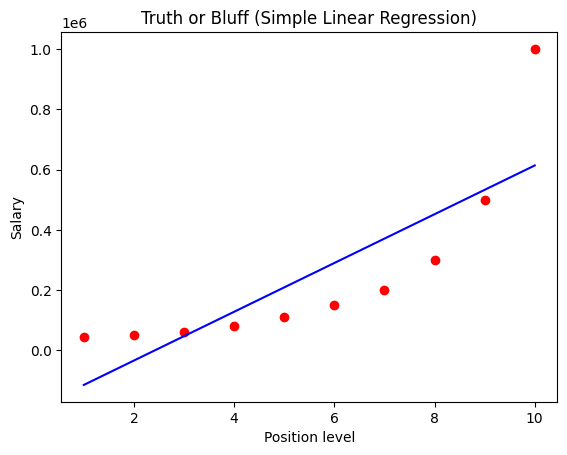

In [28]:
# Visualising the Linear Regression results
plt.scatter(x,y, color = "red")
plt.plot(x,reg_obj.predict(x), color ="blue")
# Viz Details
plt.title('Truth or Bluff (Simple Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')

In [32]:
# Fitting the dataset according to desire drgree

from sklearn.preprocessing import PolynomialFeatures
degree_obj = PolynomialFeatures(degree=2)
x_degree = degree_obj.fit_transform(x)
x_degree

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [33]:
# Fitting Polynomial Regression to the dataset

poly_reg_obj = LinearRegression()
poly_reg_obj.fit(x_degree,y)

LinearRegression()

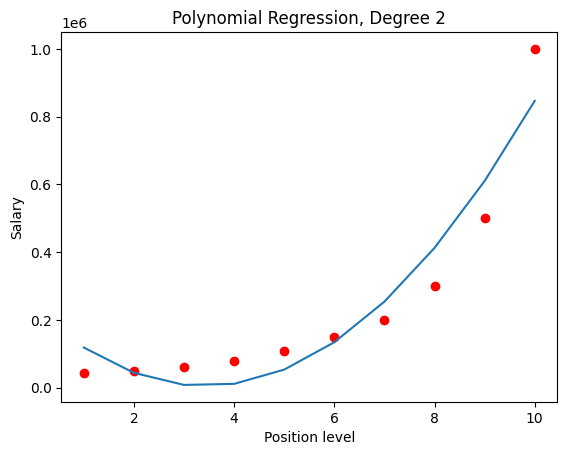

In [38]:
# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
plt.scatter(x,y, color= "red")
plt.plot(x,poly_reg_obj.predict(x_degree))

# Viz Details
plt.title('Polynomial Regression, Degree 2')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

#### Let's do some more predictions using different order

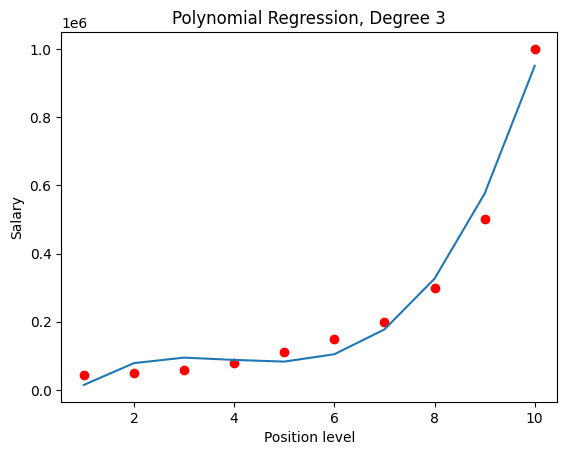

In [41]:
# Fitting the dataset according to desire drgree

degree_obj = PolynomialFeatures(degree=3)
x_degree = degree_obj.fit_transform(x)

# Fitting Polynomial Regression to the dataset

poly_reg_obj = LinearRegression()
poly_reg_obj.fit(x_degree,y)

# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
plt.scatter(x,y, color= "red")
plt.plot(x,poly_reg_obj.predict(x_degree))

# Viz Details
plt.title('Polynomial Regression, Degree 3')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

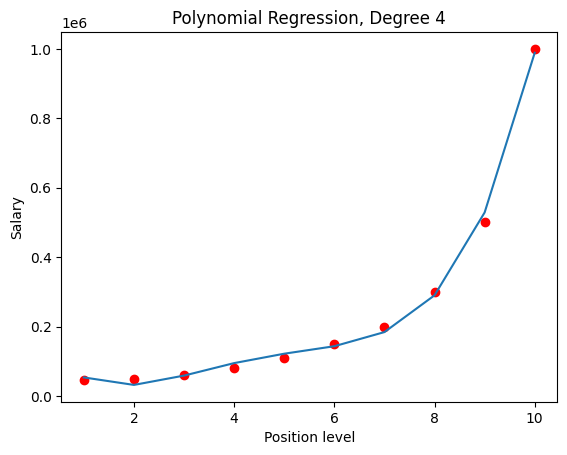

In [68]:
# Fitting the dataset according to desire drgree

degree_obj = PolynomialFeatures(degree=4)
x_degree = degree_obj.fit_transform(x)

# Fitting Polynomial Regression to the dataset

poly_reg_obj = LinearRegression()
poly_reg_obj.fit(x_degree,y)

# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
plt.scatter(x,y, color= "red")
plt.plot(x,poly_reg_obj.predict(x_degree))

# Viz Details
plt.title('Polynomial Regression, Degree 4')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [64]:
# Testing

print(min(x))
print(np.min(x))

[1]
1


[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7
 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5
 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3
 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1
 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]


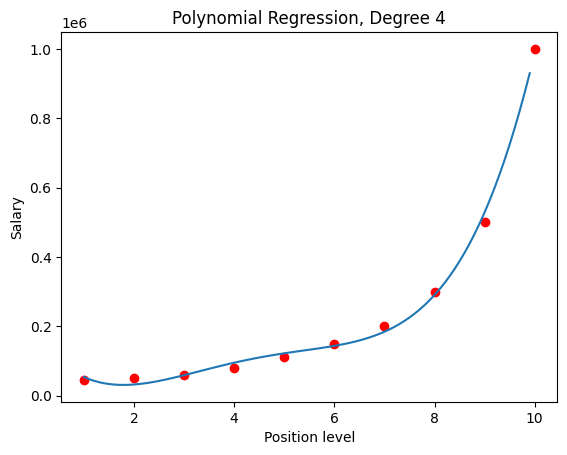

In [69]:
# Some improvement on the viz look

x_grid = np.arange(np.min(x),np.max(x),0.1)     # only min() or max() will return the values with 1D array ** so need to use np.min() and np.max()
print(x_grid)
x_grid_matrix = x_grid.reshape(len(x_grid),1)

# Visualising the Polynomial Regression results (for higher resolution and smoother curve)

plt.scatter(x,y, color= "red")
plt.plot(x_grid_matrix,poly_reg_obj.predict(degree_obj.fit_transform(x_grid_matrix)))

# Viz Details
plt.title('Polynomial Regression, Degree 4')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [70]:
# Predicting a new result with Linear Regression

reg_obj.predict([[6.5]])

array([330378.78787879])

In [71]:
# Predicting a new result with Polynomial Regression
poly_reg_obj.predict(degree_obj.fit_transform([[6.5]]))

array([158862.45265155])

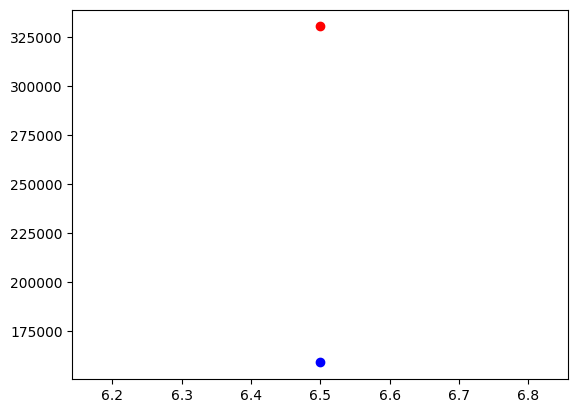

In [75]:
# Ploting the outputs from different models
plt.scatter(6.5,330378.78, color= "red")
plt.scatter(6.5,158862.45, color= "blue")
